In [44]:
from sklearn.cross_validation import train_test_split 
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from lightgbm import create_tree_digraph
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [45]:
stadiums_csv = "UEFA_Stadiums_Geo_Data_UTF8.csv"
stadiums_df = pd.read_csv(stadiums_csv)
stadiums_df.dtypes

Unnamed: 0              int64
Confederation          object
Stadium                object
City                   object
HomeTeams              object
Capacity                int64
Country                object
IOC                    object
Population              int64
UCLChampions             bool
UELChampion              bool
UCLFinalStadium          bool
UELFinalStadium          bool
Capacidad/1000Habs    float64
Latitude              float64
Longitude             float64
dtype: object

In [46]:
stadiums_df = stadiums_df.drop(['Unnamed: 0','Confederation','City','HomeTeams','IOC','Capacidad/1000Habs','Latitude', 'Longitude'], axis=1)

#bins = [1, 10000, 20000, 40000, 60000, 120000]
#labels = [1,10000,20000,40000,60000]
#stadiums_df['StadiumSize'] = pd.cut(stadiums_df['Capacity'], bins=bins, labels=labels)

#bins_pop = [1,20000000,60000000,150000000]
#labels_pop = [1,20000000,60000000]
#stadiums_df['CountryPopulation'] = pd.cut(stadiums_df['Population'], bins=bins_pop, labels=labels_pop)


stadiums_df.head()

,Stadium,Capacity,Country,Population,UCLChampions,UELChampion,UCLFinalStadium,UELFinalStadium
0,Stadiumi Besëlidhja,7000,Albania,2876591,False,False,False,False
1,Stadiumi Flamurtari,8200,Albania,2876591,False,False,False,False
2,Stadiumi Laçi,5000,Albania,2876591,False,False,False,False
3,Stadiumi Niko Dovana,12040,Albania,2876591,False,False,False,False
4,Stadiumi Selman Stërmasi,9500,Albania,2876591,False,False,False,False


In [47]:
X = stadiums_df.values[:, [1,3,5]]
Y = stadiums_df.values[:, 7]
Y=Y.astype('int')


In [48]:
X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 100) 

In [49]:
#clf_gini = DecisionTreeClassifier(criterion = "gini", 
          #  random_state = 100, max_depth=3, min_samples_leaf=5) 
  
    # Performing training #
#clf_gini.fit(X_train, y_train)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

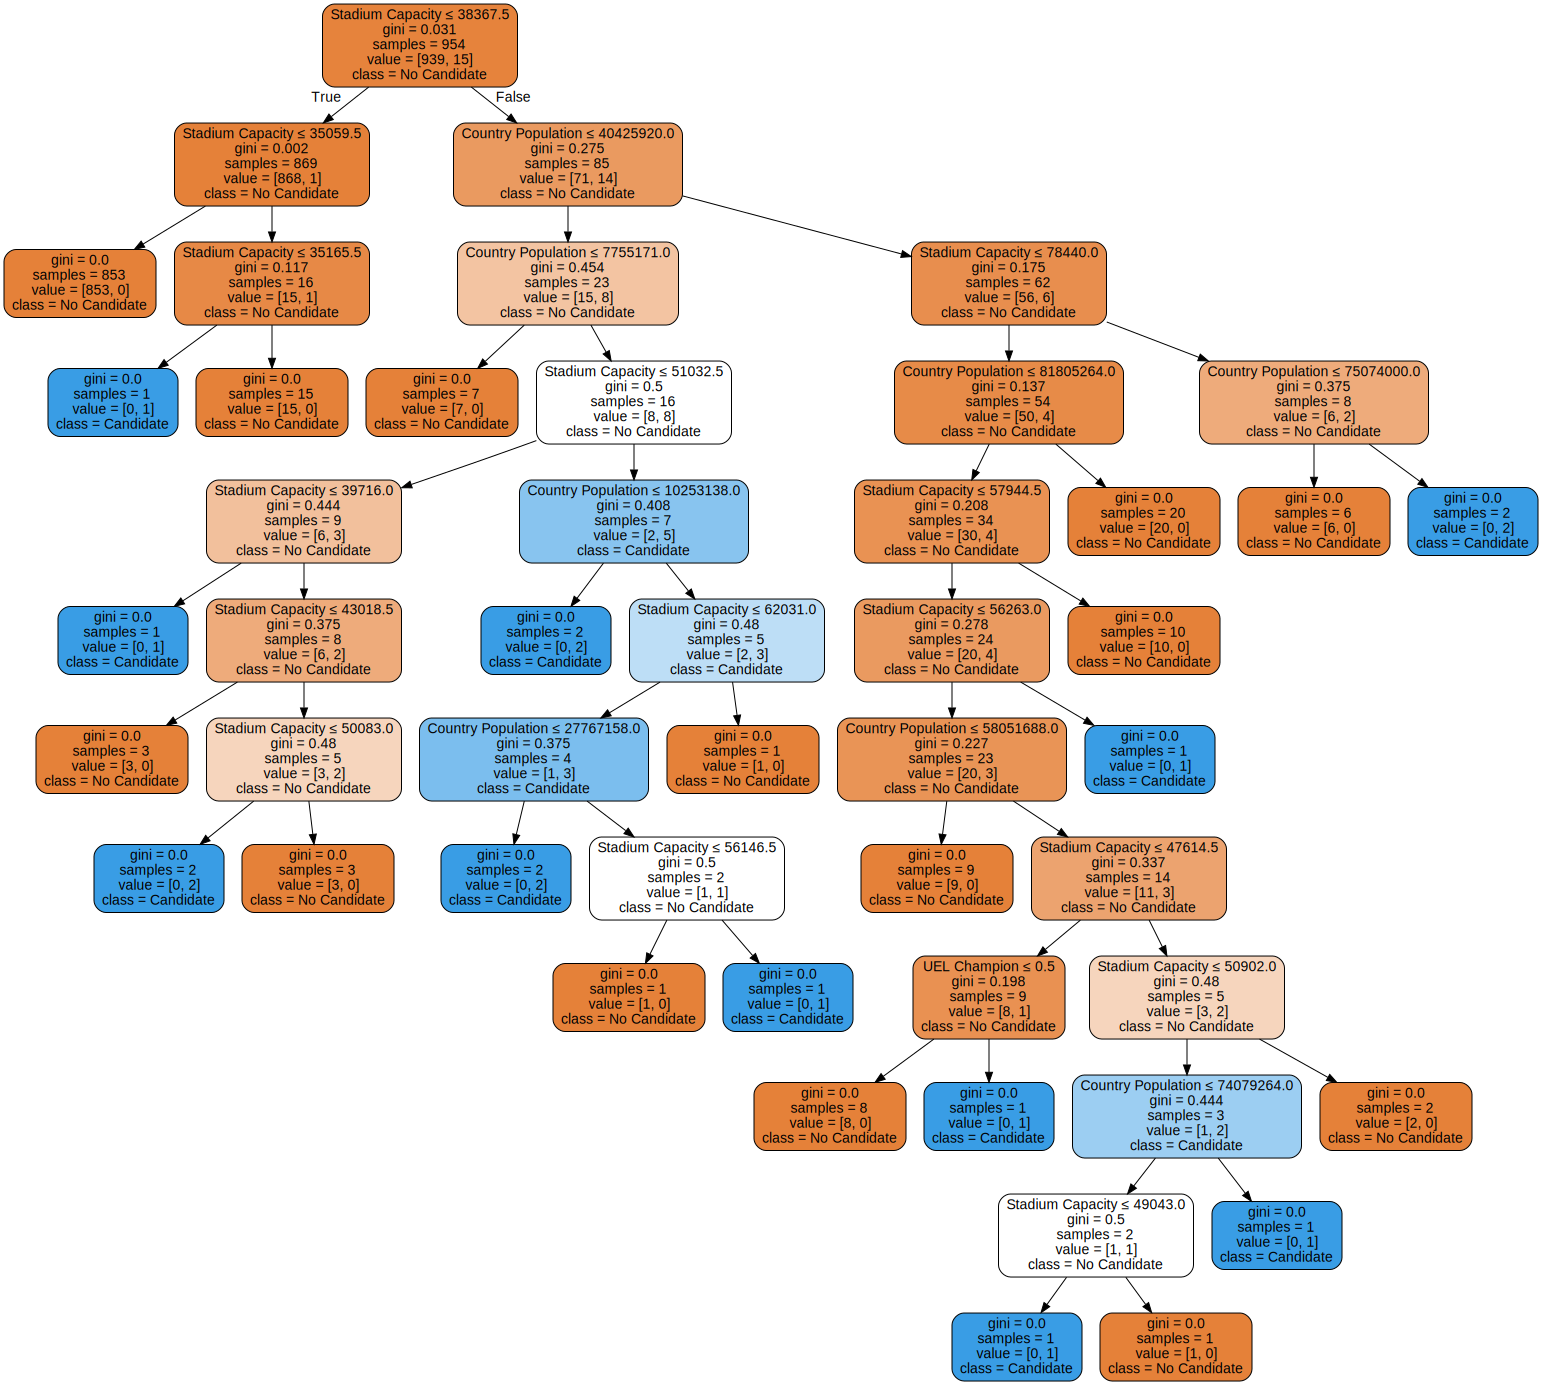

In [50]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=['Stadium Capacity','Country Population', 'UEL Champion'],  
    class_names=['No Candidate','Candidate'],  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('UELDecisionTree.png')

graph = graphviz.Source(dot_data)  
graph 

In [54]:
i=4

for (idx, row) in stadiums_df.iterrows():
    try:
    
        if (row.loc['Country']) == "Germany":
            #Store current row value for each column
            stadium = (row.loc['Stadium'])
            capacity = (row.loc['Capacity'])
            population = (row.loc['Population'])
            UELChampion = (row.loc['UELChampion'])
            y_pred = clf.predict([[capacity, population, UELChampion]]) 
            y_pred_proba = clf.predict_proba([[capacity, population, UELChampion]])
            print("Predicted values for "+stadium+":") 
            print(y_pred)
            print(y_pred_proba)
    except:
        #Print to verify when a city is not found
        print("Not found")
        #Count to validate how many cities were not found
        continue

Predicted values for Alfred-Kunze-Sportpark:
[0]
[[ 1.  0.]]
Predicted values for Allianz Arena:
[0]
[[ 1.  0.]]
Predicted values for Alte Försterei:
[0]
[[ 1.  0.]]
Predicted values for Audi-Sportpark:
[0]
[[ 1.  0.]]
Predicted values for Auestadion:
[0]
[[ 1.  0.]]
Predicted values for BayArena:
[0]
[[ 1.  0.]]
Predicted values for Benteler-Arena:
[0]
[[ 1.  0.]]
Predicted values for Borussia Park:
[0]
[[ 1.  0.]]
Predicted values for Brita-Arena:
[0]
[[ 1.  0.]]
Predicted values for Bruchwegstadion:
[0]
[[ 1.  0.]]
Predicted values for Carl-Benz-Stadion:
[0]
[[ 1.  0.]]
Predicted values for Commerzbank Arena:
[0]
[[ 1.  0.]]
Predicted values for Continental Arena:
[0]
[[ 1.  0.]]
Predicted values for Dietmar-Hopp-Stadion:
[0]
[[ 1.  0.]]
Predicted values for DKB Arena:
[0]
[[ 1.  0.]]
Predicted values for Donaustadion:
[0]
[[ 1.  0.]]
Predicted values for Eintracht-Stadion:
[0]
[[ 1.  0.]]
Predicted values for Ellenfeldstadion:
[0]
[[ 1.  0.]]
Predicted values for ERDGAS Sportpark:


In [56]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


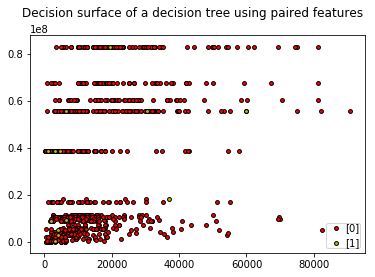

In [24]:
# Plot the training points

# Parameters
n_classes = 2
plot_colors = "ryb"
plot_step = 0.02


for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(X_train, y_train)
#plot_tree(clf, filled=True)
#lightgbm.create_tree_digraph(clf, filled=True)
plt.show()

In [55]:
classification_report(y_test, y_pred) 

ValueError: Found input variables with inconsistent numbers of samples: [410, 1]